<a href="https://www.kaggle.com/code/martinab/categorical-features-encoding?scriptVersionId=113933305" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Is there a cat in your dat?**

### Overview

A common task in machine learning pipelines is encoding categorical variables for a given algorithm in a format that allows as much useful signal as possible to be captured.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:

- binary features
- low- and high-cardinality nominal features
- low- and high-cardinality ordinal features
- (potentially) cyclical features <br>

This Playground competition will give you the opportunity to try different encoding schemes for different algorithms to compare how they perform. 

![cat](https://i.kinja-img.com/gawker-media/image/upload/s--rqCW9nxC--/c_scale,f_auto,fl_progressive,q_80,w_800/p4b69sblvgebowkdhnfy.jpg)

### Table of Content

- [Importing Libraries](#imports)
- [Exploring the Data](#explore_data)
   - [Binary features](#binary_features)
   - [Nominal features](#nominal_features)
   - [Ordinal features](#ordinal_features)
   - [Cyclical features](#cyclical_features)
- [Categorical Feature Encoding](#cat)  
   - [Binary features encoding](#bin_cat)
   - [Nominal features encoding](#nom_cat)
   - [Ordinal features encoding](#ord_cat)
   - [Cyclical features encoding](#cyc_cat)

### Importing Libraries <a class="anchor" id="imports"></a>

In [1]:
# Importing numpy (linear algebra) and pandas (data processing): 
import numpy as np 
import pandas as pd 

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import os
import matplotlib.ticker as ticker

### Exploring the Data <a class="anchor" id="explore_data"></a>

In this competition, we will be predicting the probability [0, 1] of a binary target column.

The data contains binary features (bin_), nominal features (nom_), ordinal features (ord_) as well as (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

Since the purpose of this competition is to explore various encoding strategies, the data has been simplified in that (1) there are no missing values, and (2) the test set does not contain any "unseen" feature values. (Of course, in real-world settings both of these factors are often important to consider!)

In [2]:
# Explore what's in the cat-in-the-dat folder:
print(os.listdir("../input/cat-in-the-dat"))

['sample_submission.csv', 'train.csv', 'test.csv']


In [3]:
# Read train, test and sample_submission data:
train_df = pd.read_csv("../input/cat-in-the-dat/train.csv")
test_df = pd.read_csv("../input/cat-in-the-dat/test.csv")
submission = pd.read_csv("../input/cat-in-the-dat/sample_submission.csv")

In [4]:
submission.head()

,id,target
0,300000,0.5
1,300001,0.5
2,300002,0.5
3,300003,0.5
4,300004,0.5


In [5]:
# Shape of the train and testdataset:
print(train_df.shape)

(300000, 25)


In [6]:
# To display first 5 rows of the train_df:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


**Names of all columns**

In [7]:
# Print the names of all columns in train DataFrame:
print(train_df.columns.values)

['id' 'bin_0' 'bin_1' 'bin_2' 'bin_3' 'bin_4' 'nom_0' 'nom_1' 'nom_2'
 'nom_3' 'nom_4' 'nom_5' 'nom_6' 'nom_7' 'nom_8' 'nom_9' 'ord_0' 'ord_1'
 'ord_2' 'ord_3' 'ord_4' 'ord_5' 'day' 'month' 'target']


**Checking for missing data (nan)**

In [8]:
# Are there any missing values in train_df?
# train_df.apply(axis=0, func=lambda x : any(pd.isnull(x)))

In [9]:
# Function to describe variables
def desc(df):
    summ = pd.DataFrame(df.dtypes,columns=['Data_Types'])
    summ = summ.reset_index()
    summ['Columns'] = summ['index']
    summ = summ[['Columns','Data_Types']]
    summ['Missing'] = df.isnull().sum().values    
    summ['Uniques'] = df.nunique().values
    return summ

# Function to analyse missing values
def nulls_report(df):
    nulls = df.isnull().sum()
    nulls = nulls[df.isnull().sum()>0].sort_values(ascending=False)
    nulls_report = pd.concat([nulls, nulls / df.shape[0]], axis=1, keys=['Missing_Values','Missing_Ratio'])
    return nulls_report

In [10]:
# Use desc function to describe test data:
desc(train_df)

,Columns,Data_Types,Missing,Uniques
0,id,int64,0,300000
1,bin_0,int64,0,2
2,bin_1,int64,0,2
3,bin_2,int64,0,2
4,bin_3,object,0,2
5,bin_4,object,0,2
6,nom_0,object,0,3
7,nom_1,object,0,6
8,nom_2,object,0,6
9,nom_3,object,0,6


**Target distribution**

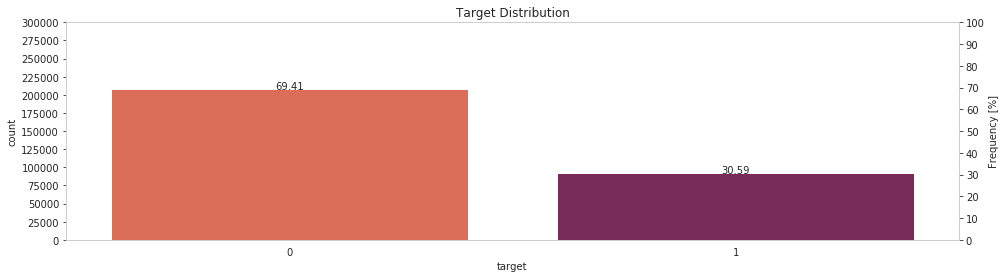

In [11]:
# Bar chart of frequency of digit occurance in our train dataset:
total = float(len(train_df))

plt.figure(figsize=(16,4))
ax = sns.countplot(x = 'target', data=train_df,  palette = 'rocket_r')

# Make twin axis
ax2=ax.twinx()
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height*100/total),
           # '{0:.0%}'.format(height/total),
            ha="center") 


# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the Frequency [%] range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,300000)

# And use a MultipleLocator to ensure a tick spacing of 10
ax.yaxis.set_major_locator(ticker.MultipleLocator(25000))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Turn the grid on ax2 off, otherwise the gridlines will cut through percentages %:
ax.grid(False)
ax2.grid(False)   
    
plt.title('Target Distribution')
plt.show()

In [12]:
print(train_df['target'].value_counts())

0    208236
1     91764
Name: target, dtype: int64


In our train_df we have 300,000 rows of data with 208,236 (69.41%) rows with the target of 0 and 91,764 (30.59%) rows with the target of 1. 

#### **Binary (bin_) features** <a class="anchor" id="binary_features"></a>

In [13]:
# Define bin list:
bin = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

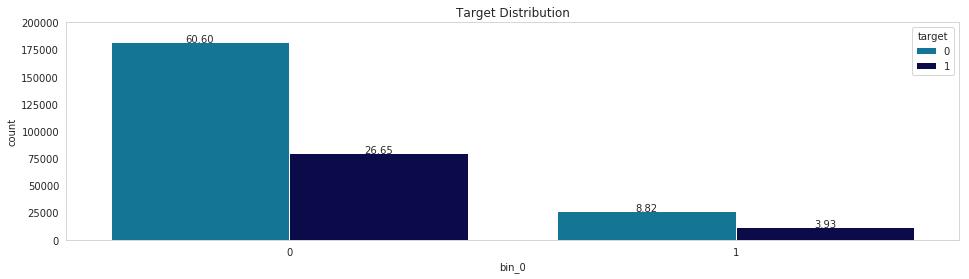

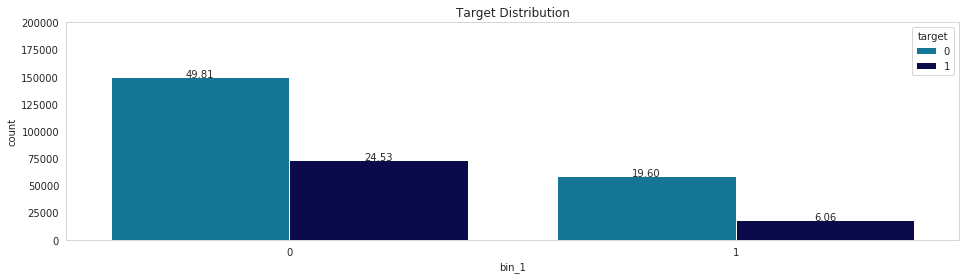

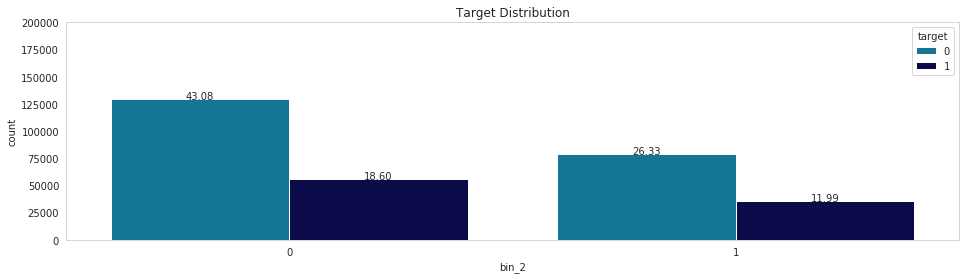

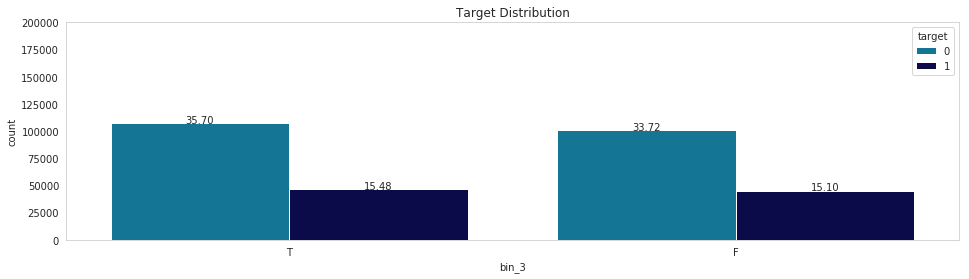

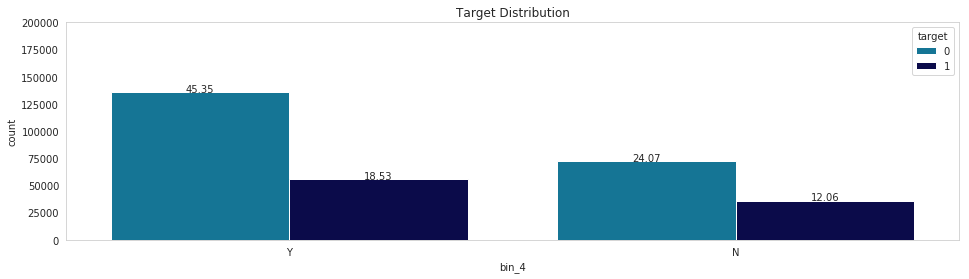

In [14]:
# Bar charts for binary features, split according to the target:
for i in bin:
    plt.figure(figsize=(16,4))
    ax = sns.countplot(x=i, 
                       hue="target", 
                       palette= 'ocean_r',
                       data=train_df
                       )
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height*100/total),
                #'{0:.0%}'.format(height/total),
                ha="center") 
       
        ax.set_ylim(0,200000)
        ax.grid(False)

        plt.title('Target Distribution')
plt.show()

Columns bin_3 and bin_4 contain T,F and Y,N respectively, isntead of numerical values 0,1.

#### **Nominal (nom_) features** <a class="anchor" id="nominal_features"></a>

In [15]:
# Define nom as:
nom = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']

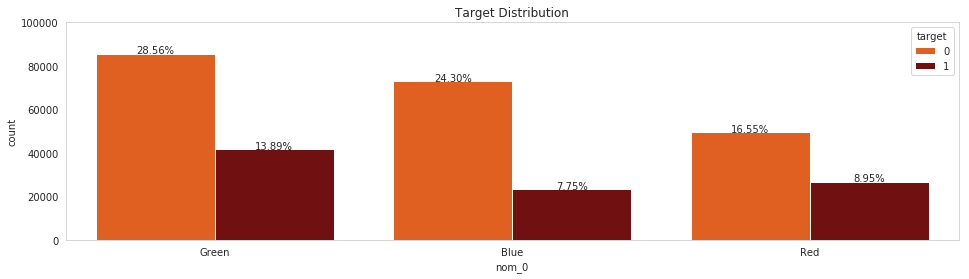

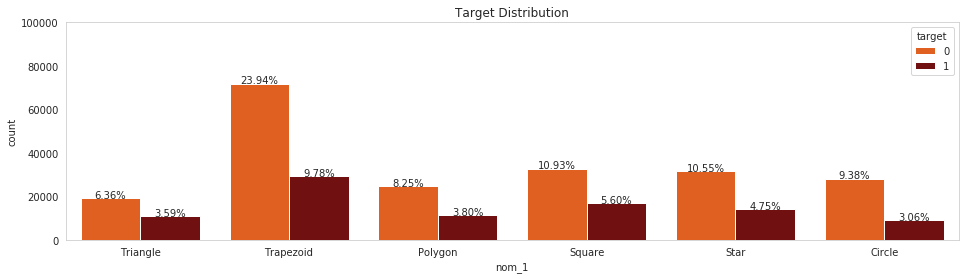

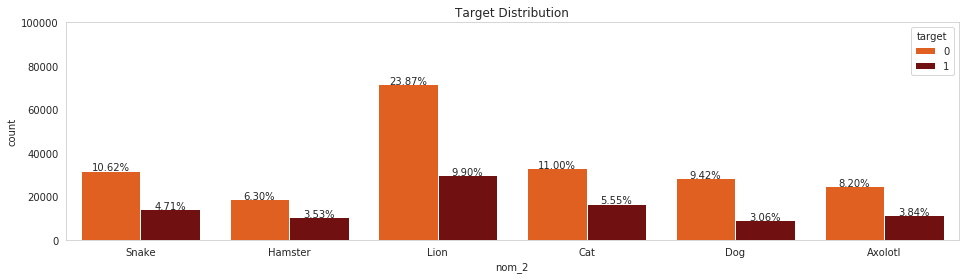

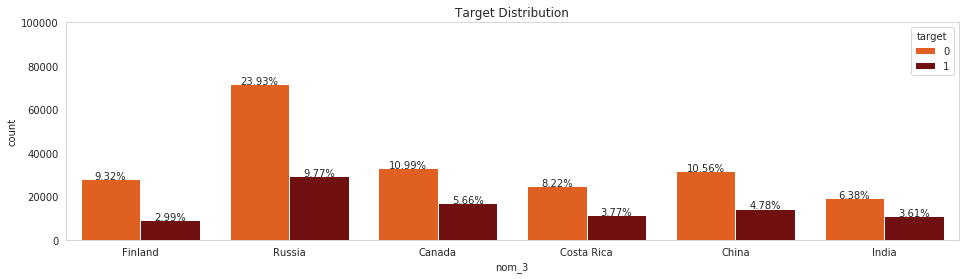

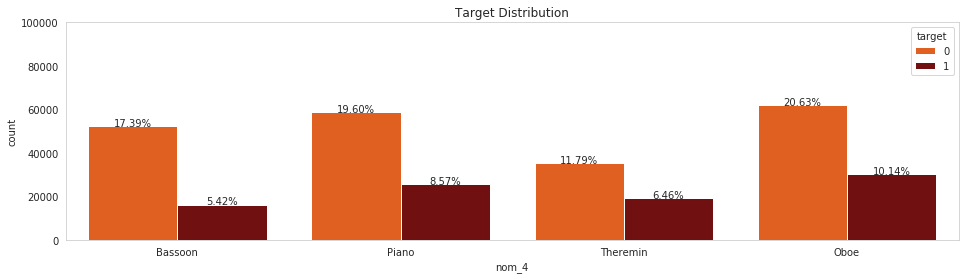

In [16]:
# Bar charts for nominal features, split according to the target:
for i in nom[0:5]:
    plt.figure(figsize=(16,4))
    ax = sns.countplot(x=i, 
                       hue="target", 
                       palette= 'gist_heat_r',
                       data=train_df
                       )
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height*100/total),
                #'{0:.0%}'.format(height/total),
                ha="center") 
       
        ax.set_ylim(0,100000)
        ax.grid(False)

        plt.title('Target Distribution')
plt.show()  

This is interesting: there are some similarities in Target Distributions for nom1, nom2 and nom3. To be more at target distribution rounded to the nearest integer and compare the following: 
- Trapezoid, Lion, Russia (24%,10%)
- Square, Cat, Canada (11%, 6%)
- Star, Snake, China (11%, 5%)
- Circle, Dog, Finaland (9%, 3%)
- Polygon, Axolotl, Costa Rica (8%, 4%)
- Triangle, Hamster, India (6%,4%)

Let's have a look at the value tables for nom_1, nom_2 and nom_3, just to confirm that Target Distribution is very similar for all three features.

In [17]:
# Create a crosstab with nom_1 and target:
print('Crosstab for numerical target distribution in nom_1:')

pd.crosstab([train_df.target], 
            [train_df.nom_1],
             margins=True).style.background_gradient(cmap='autumn_r')

Crosstab for numerical target distribution in nom_1:


nom_1,Circle,Polygon,Square,Star,Trapezoid,Triangle,All
target,,,,,,,
0,28152,24741,32787,31645,71833,19078,208236
1,9168,11402,16810,14259,29348,10777,91764
All,37320,36143,49597,45904,101181,29855,300000


In [18]:
# Create a crosstab with nom_2 and target:
print('Crosstab for numerical target distribution in nom_2:')

pd.crosstab([train_df.target], 
            [train_df.nom_2],
             margins=True).style.background_gradient(cmap='autumn_r')

Crosstab for numerical target distribution in nom_2:


nom_2,Axolotl,Cat,Dog,Hamster,Lion,Snake,All
target,,,,,,,
0,24608,33005,28265,18895,71607,31856,208236
1,11528,16654,9179,10592,29688,14123,91764
All,36136,49659,37444,29487,101295,45979,300000


In [19]:
# Create a crosstab with nom_3 and target:
print('Crosstab for numerical target distribution in nom_3:')

pd.crosstab([train_df.target], 
            [train_df.nom_3],
             margins=True).style.background_gradient(cmap='autumn_r')

Crosstab for numerical target distribution in nom_3:


nom_3,Canada,China,Costa Rica,Finland,India,Russia,All
target,,,,,,,
0,32978,31691,24663,27972,19130,71802,208236
1,16973,14353,11325,8970,10822,29321,91764
All,49951,46044,35988,36942,29952,101123,300000


We still have columns from nom_5 to nom_9, those hold from 222 to 11,981 categories respectively. Let's have a look at how many categories each of the columns hold:

#### **Ordinal (ord_) features** <a class="anchor" id="ordinal_features"></a>

In [20]:
ord = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']

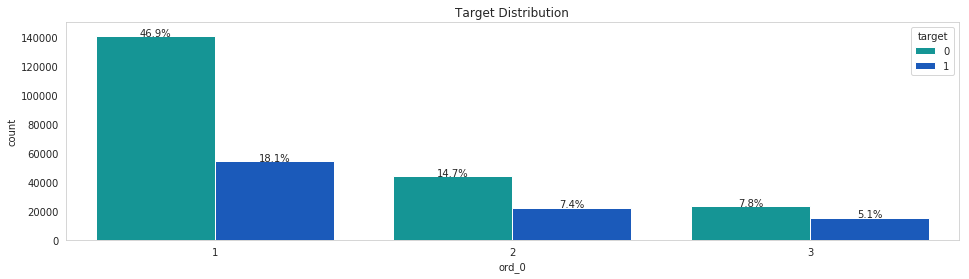

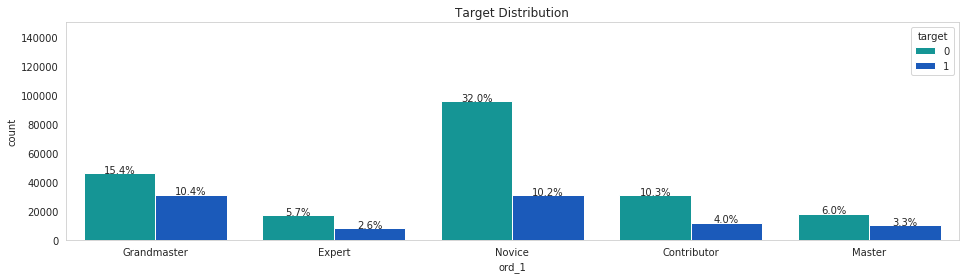

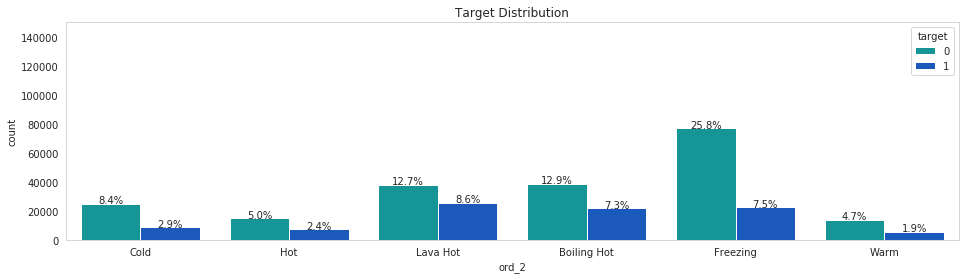

In [21]:
# Bar charts for ordinal features, split according to the target:

for i in ord[0:3]:
    plt.figure(figsize=(16,4))
    ax = sns.countplot(x=i, 
                       hue="target", 
                       palette= 'winter_r',
                       data=train_df
                       )
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(height*100/total),
                #'{0:.0%}'.format(height/total),
                ha="center") 
       
        ax.set_ylim(0,150000)
        ax.grid(False)

        plt.title('Target Distribution')
plt.show()

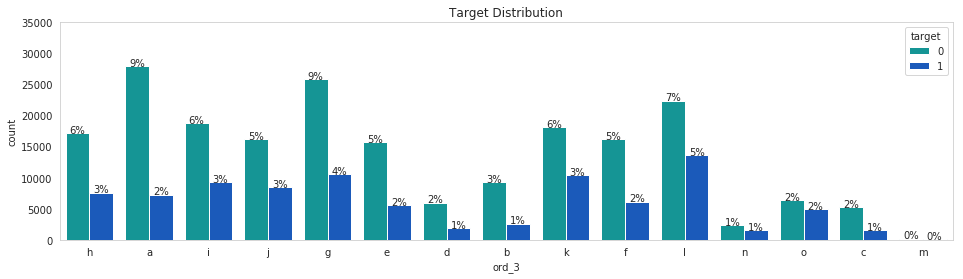

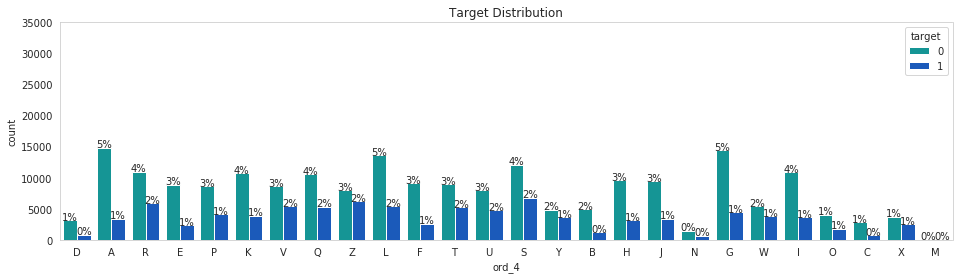

In [22]:
for i in ord[3:5]:
    plt.figure(figsize=(16,4))
    ax = sns.countplot(x=i, 
                       hue="target", 
                       palette= 'winter_r',
                       data=train_df
                       )
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                #'{:1.1f}%'.format(height*100/total),
                '{0:.0%}'.format(height/total),
                ha="center") 
       
        ax.set_ylim(0,35000)
        ax.grid(False)

        plt.title('Target Distribution')
plt.show()

In [23]:
# Number of unique values in ord_5:
print('Number of unique values for ord_5: ' + str(train_df['ord_5'].nunique()))

Number of unique values for ord_5: 192


For ord_5 we have 192 unique values, all of them consist of 2 alphabet letters.

#### **Cyclical features** <a class="anchor" id="cyclical_features"></a>

Hours of the day, days of the week, months in a year are all examples of features that are cyclical. In our DataFrame we have days and months, let's have a look at unique values for those features.

In [24]:
print('Unique values of day:',train_df.day.unique())
print('Unique values of month:',train_df.month.unique())

Unique values of day: [2 7 5 4 3 1 6]
Unique values of month: [ 2  8  1  4 10  3  7  9 12 11  5  6]


As we could expect, we have 1-7 values for day and 1-12 values for month feature. 

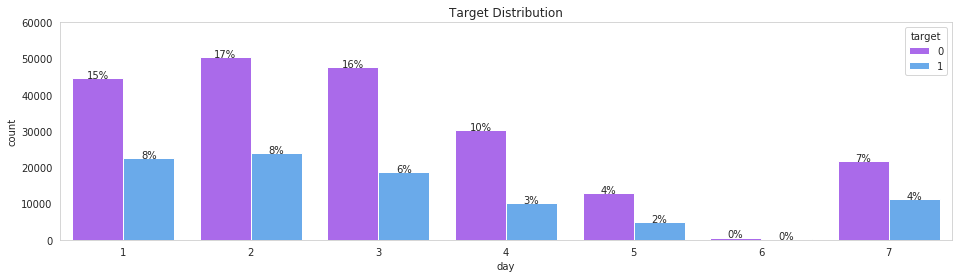

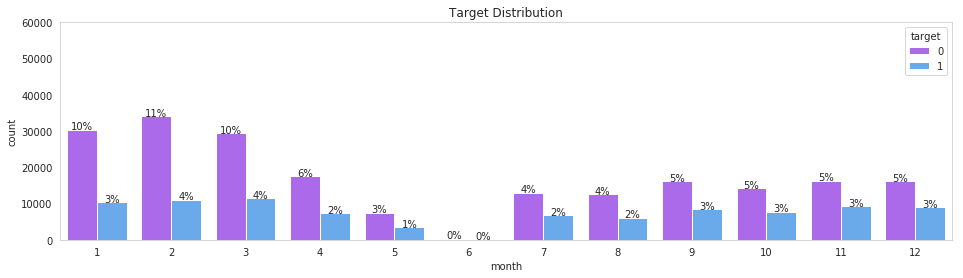

In [25]:
cyc = ['day', 'month']


for i in cyc:
    plt.figure(figsize=(16,4))
    ax = sns.countplot(x=i, 
                       hue="target", 
                       palette= 'cool_r',
                       data=train_df
                       )
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                #'{:1.1f}%'.format(height*100/total),
                '{0:.0%}'.format(height/total),
                ha="center") 
       
        ax.set_ylim(0,60000)
        ax.grid(False)

        plt.title('Target Distribution')
plt.show()      

Interesting! We don't have much data for June and for Saturdays. 

## Categorical Features Encoding <a class="anchor" id="cat"></a>

Before we start working on feature encoding, we will combine train_df and test_df into one DataFrame called tetra_df and separate target column. This will allow us to make changes to both DataFrames at the same time.

In [26]:
# Assign output target to the following variable:
target = train_df['target']

In [27]:
# Merge train and test data into tetra_df and drop target and id column:
tetra_df = train_df.append(test_df, ignore_index = True, sort = 'True')
tetra_df = tetra_df.drop(['target', 'id'], axis = 1)

In [28]:
# Check if merge worked (must have 500,000 entries):
tetra_df.shape

(500000, 23)

In [29]:
# Create indexes to separate data later:
train_df_idx = len(train_df)
test_df_idx = len(tetra_df) - len(test_df)

### Binary features encoding

Since bin_3 and bin_4 contain only two values, we can convert them to a binary columns. Let's assume that: <br>
 => T = True and F = False, <br>
 => Y = Yes and N = No <br>
We can just simply replace T by1 in bin_3, F by 0 and Y by 1, N by 0 in bin_4.  


In [30]:
# Convert T, F in bin_3 to binary values (0,1):
tetra_df['bin_3'] = tetra_df['bin_3'].map({'T':1, 'F':0})

# Similarly convert Y, N in bin_4 to binary values:
tetra_df['bin_4'] = tetra_df['bin_4'].map({'Y':1, 'N':0})

In [31]:
# Check the outcome:
tetra_df[bin].head()

,bin_0,bin_1,bin_2,bin_3,bin_4
0,0,0,0,1,1
1,0,1,0,1,1
2,0,0,0,0,1
3,0,1,0,0,1
4,0,0,0,0,0


### Nominal features encoding

In [32]:
# One hot encoding for column : nom_0 to nom_4
tetra_df = pd.get_dummies(tetra_df, columns = nom[0:5],
                        prefix = nom[0:5], 
                        drop_first = True)

In [33]:
# Encoding hex features
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
features_hex = nom[5:]

for col in features_hex:
    labelencoder.fit(tetra_df[col])
    tetra_df[col] = labelencoder.transform(tetra_df[col])

### Ordinal features encoding

In [34]:
#tetra_df[ord].head()

In [35]:
# Convert ord_1 by dictionary mapping as follows:
tetra_df['ord_1'] = tetra_df['ord_1'].map({
    'Novice': 0,
    'Contributor': 1,
    'Master': 2,
    'Expert' : 3,
    'Grandmaster': 4
})

# Similarly convert ord_2:
tetra_df['ord_2'] = tetra_df['ord_2'].map({
    'Freezing': 0,
    'Cold': 1,
    'Warm': 2,
    'Hot' : 3,
    'Boiling Hot': 4,
    'Lava Hot' : 5
})

In [36]:
# Change type of ord_3 to category, create a dictionary alph that orders letters alphabetically:
tetra_df['ord_3'] = tetra_df['ord_3'].astype('category')
alph = dict(zip(tetra_df['ord_3'],tetra_df['ord_3'].cat.codes))
# Map alphord to ord_3 and change type of ord_3 to integer:
tetra_df['ord_3'] = tetra_df['ord_3'].map(alph)
tetra_df['ord_3'] = tetra_df['ord_3'].astype(int)

# Similarly change ord_4:
tetra_df['ord_4'] = tetra_df['ord_4'].astype('category')
alph1 = dict(zip(tetra_df['ord_4'],tetra_df['ord_4'].cat.codes))
tetra_df['ord_4'] = tetra_df['ord_4'].map(alph1)
tetra_df['ord_4'] = tetra_df['ord_4'].astype(int)

In [37]:
# Create sorted list of ord_5 values (ordered alphabetically):
ordli = sorted(list(set(tetra_df['ord_5'].values)))

# Create mapping dictionary alph2 for ord_5
alph2 = dict(zip(ordli, range(len(ordli))))  

# Map alph2 dictionary to ord_5
tetra_df['ord_5'] = tetra_df['ord_5'].map(alph2)

### Cyclical features encoding

One of the methods for cyclical features encoding is to perform sine and cosine transformation of the feature by using the following formulas:

$$x_{sin} = sin(\frac{2*\pi*x}{max(x)})$$

$$x_{cos} = cos(\frac{2*\pi*x}{max(x)})$$

Since both trigonometric functions are periodical, it's not a good idea to use only one of them for encoding. The reason is simple: two different features can be encoded as the same value. <br>
By using sin and cos function we will avoid this and assign an unique position on a [unit circle](http://mathworld.wolfram.com/UnitCircle.html).

In [38]:
# Cyclical encoding for day:
tetra_df['day_sin'] = np.sin(2 * np.pi * tetra_df['day']/7.0)
tetra_df['day_cos'] = np.cos(2 * np.pi * tetra_df['day']/7.0)

# Cyclical encoding for month:
tetra_df['month_sin'] = np.sin(2 * np.pi * tetra_df['month']/12.0)
tetra_df['month_cos'] = np.cos(2 * np.pi * tetra_df['month']/12.0)

Both sin and cos values will be in the range between -1 and 1.

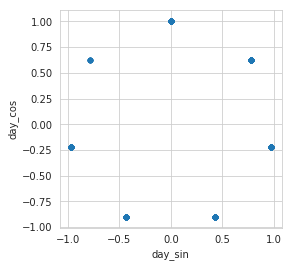

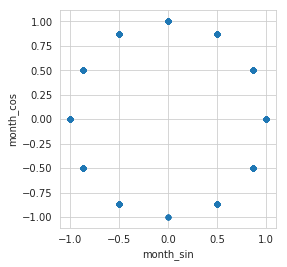

In [39]:
# Show that Encoded values are now placed on the circle with radius 1 and origing at [0,0]:
x = tetra_df.day_sin
y = tetra_df.day_cos

tetra_df.sample(5000).plot.scatter('day_sin','day_cos').set_aspect('equal')
tetra_df.sample(5000).plot.scatter('month_sin','month_cos').set_aspect('equal')

In [40]:
tetra_df = tetra_df.drop(['day', 'month'], axis = 1)

In [41]:
# Print the names of all columns in tetra_df DataFrame:
 print(tetra_df.columns.values)

['bin_0' 'bin_1' 'bin_2' 'bin_3' 'bin_4' 'nom_5' 'nom_6' 'nom_7' 'nom_8'
 'nom_9' 'ord_0' 'ord_1' 'ord_2' 'ord_3' 'ord_4' 'ord_5' 'nom_0_Green'
 'nom_0_Red' 'nom_1_Polygon' 'nom_1_Square' 'nom_1_Star' 'nom_1_Trapezoid'
 'nom_1_Triangle' 'nom_2_Cat' 'nom_2_Dog' 'nom_2_Hamster' 'nom_2_Lion'
 'nom_2_Snake' 'nom_3_China' 'nom_3_Costa Rica' 'nom_3_Finland'
 'nom_3_India' 'nom_3_Russia' 'nom_4_Oboe' 'nom_4_Piano' 'nom_4_Theremin'
 'day_sin' 'day_cos' 'month_sin' 'month_cos']


### Normalize data columns

In [42]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()

# x returns a numpy array
#x = tetra_df.values 


#x_scaled = min_max_scaler.fit_transform(x)
#tetra_df = pd.DataFrame(x_scaled)

In [43]:
#tetra_df.describe()

### Training the Model

In [44]:
# Creating training and testing data:
training = tetra_df[ : train_df_idx]
testing = tetra_df[test_df_idx :]

In [45]:
# For splitting data we will be using train_test_split from sklearn:
from sklearn.model_selection import train_test_split

In [46]:
X = training
y = target

In [47]:
# Splitting the training data into test and train, we are testing on 0.20 = 20% of dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=13)

**USE XGBoost CLASSIFIER**

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [49]:
xgb = XGBClassifier(objective= 'binary:logistic'
                    , learning_rate=0.7
                    , max_depth=3
                    , n_estimators=250
                    , scale_pos_weight=2
                    , random_state=42
                    , colsample_bytree=0.5
                    )
    
xgb.fit(X_train, y_train)   

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
y_predict = xgb.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.74      0.79     41454
           1       0.54      0.66      0.59     18546

    accuracy                           0.72     60000
   macro avg       0.69      0.70      0.69     60000
weighted avg       0.74      0.72      0.73     60000



In [51]:
# Confusion matrix cm:
cm = confusion_matrix(y_test,y_predict)
cm

array([[30855, 10599],
       [ 6216, 12330]])

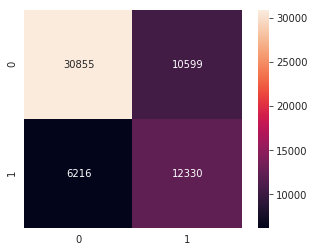

In [52]:
# Quick overview of our confusion matrix:
sns.heatmap(cm, annot = True, square = True, fmt='g')

In [53]:
prediction = xgb.predict(testing)

In [54]:
# Combine ImageID and Label into one DataFrame:
final_result = pd.DataFrame({'target': prediction, 'id': submission.id})
final_result = final_result[['id', 'target']]

# Downloading final_result dataset as digit_output.csv:
final_result.to_csv('cat_output.csv', index = False)